In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir("drive/My Drive/ds_project")

In [3]:
df = pd.read_csv("Medium_AggregatedData.csv")

In [4]:
# remove unnecessary columns
X = df.drop(['audioVersionDurationSec', 'codeBlock', 'collectionId', 'createdDate', 'createdDatetime', 'firstPublishedDate',
             'firstPublishedDatetime', 'latestPublishedDate', 'latestPublishedDatetime', 'postId', 'recommends', 'responsesCreatedCount',
             'socialRecommendsCount', 'tagsCount', 'uniqueSlug', 'updatedDate', 'updatedDatetime', 'url', 'vote',
             'publicationdescription', 'publicationdomain', 'publicationfacebookPageName', 'publicationfollowerCount', 'publicationname',
             'publicationpublicEmail', 'publicationslug', 'publicationtags', 'publicationtwitterUsername', 'tag_name', 'slug', 'postCount',
             'author', 'bio', 'userId', 'userName', 'usersFollowedByCount', 'usersFollowedCount', 'scrappedDate'], axis=1)

In [5]:
X.head()

,codeBlockCount,imageCount,isSubscriptionLocked,language,linksCount,readingTime,subTitle,text,title,totalClapCount,wordCount,name
0,0.0,1,False,en,1,0.958491,A major private IT company implements blockcha...,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,201,Blockchain
1,0.0,1,False,en,1,0.958491,A major private IT company implements blockcha...,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,201,Samsung
2,0.0,1,False,en,1,0.958491,A major private IT company implements blockcha...,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,201,It
3,0.0,13,False,en,24,19.716981,Introduction,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,4854,Technology
4,0.0,13,False,en,24,19.716981,Introduction,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,4854,Robotics


In [ ]:
# which columns contain atleast one null value
X.isnull().any(axis=0)

codeBlockCount          False
imageCount              False
isSubscriptionLocked    False
language                False
linksCount              False
readingTime             False
subTitle                 True
text                    False
title                    True
totalClapCount          False
wordCount               False
name                    False
dtype: bool

In [ ]:
# select only those rows which are not na
X = X[X['subTitle'].notna()]
X = X[X['title'].notna()]

In [ ]:
# select only those rows where language is english
X = X[X['language'] == 'en']

In [22]:
# split the data based on tags

ds = X[X['name'] == 'Data Science']
ai = X[X['name'] == 'Artificial Intelligence']
ml = X[X['name'] == 'Machine Learning']
dl = X[X['name'] == 'Deep Learning']

In [23]:
# removing columns which are not required anymore

ml = ml.drop(columns=['name', 'language'], axis=1)
ml.drop(['codeBlockCount'], axis=1, inplace=True)
ml.head()

,imageCount,isSubscriptionLocked,linksCount,readingTime,subTitle,text,title,totalClapCount,wordCount
26,1,False,1,1.818868,"Aidoc, a leading AI startup utilizing deep lea...",Aidoc Gets CE Mark for Deep Learning Solution\...,Aidoc Gets CE Mark for Deep Learning Solution,0,429
32,11,False,12,5.684906,The model for deep learning consists of a comp...,The Meta Model and Meta Meta-Model of Deep Lea...,The Meta Model and Meta Meta-Model of Deep Lea...,271,1162
50,1,False,4,2.079245,"Hi everybody , this little snippet will show y...",A Little Snippet to Automate Web Scraping usin...,A Little Snippet to Automate Web Scraping usin...,11,498
59,0,False,1,0.067925,https://www.linkedin.com/pulse/age-theory-over...,Is the age of theory over as Machine Learning ...,Is the age of theory over as Machine Learning ...,0,18
61,9,False,4,5.705660,Artificial Intelligence (AI) is currently one ...,AI based UI Development (AI-UI)\nArtificial In...,AI based UI Development (AI-UI),195,1194


In [24]:
# catgorical variable

ml = pd.concat([ml, pd.get_dummies(ml.isSubscriptionLocked)], axis=1)
ml = ml.drop(['isSubscriptionLocked'], axis=1);

In [25]:
ml.head()

,imageCount,linksCount,readingTime,subTitle,text,title,totalClapCount,wordCount,False,True
26,1,1,1.818868,"Aidoc, a leading AI startup utilizing deep lea...",Aidoc Gets CE Mark for Deep Learning Solution\...,Aidoc Gets CE Mark for Deep Learning Solution,0,429,1,0
32,11,12,5.684906,The model for deep learning consists of a comp...,The Meta Model and Meta Meta-Model of Deep Lea...,The Meta Model and Meta Meta-Model of Deep Lea...,271,1162,1,0
50,1,4,2.079245,"Hi everybody , this little snippet will show y...",A Little Snippet to Automate Web Scraping usin...,A Little Snippet to Automate Web Scraping usin...,11,498,1,0
59,0,1,0.067925,https://www.linkedin.com/pulse/age-theory-over...,Is the age of theory over as Machine Learning ...,Is the age of theory over as Machine Learning ...,0,18,1,0
61,9,4,5.705660,Artificial Intelligence (AI) is currently one ...,AI based UI Development (AI-UI)\nArtificial In...,AI based UI Development (AI-UI),195,1194,1,0


In [ ]:
# observations about textual data

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

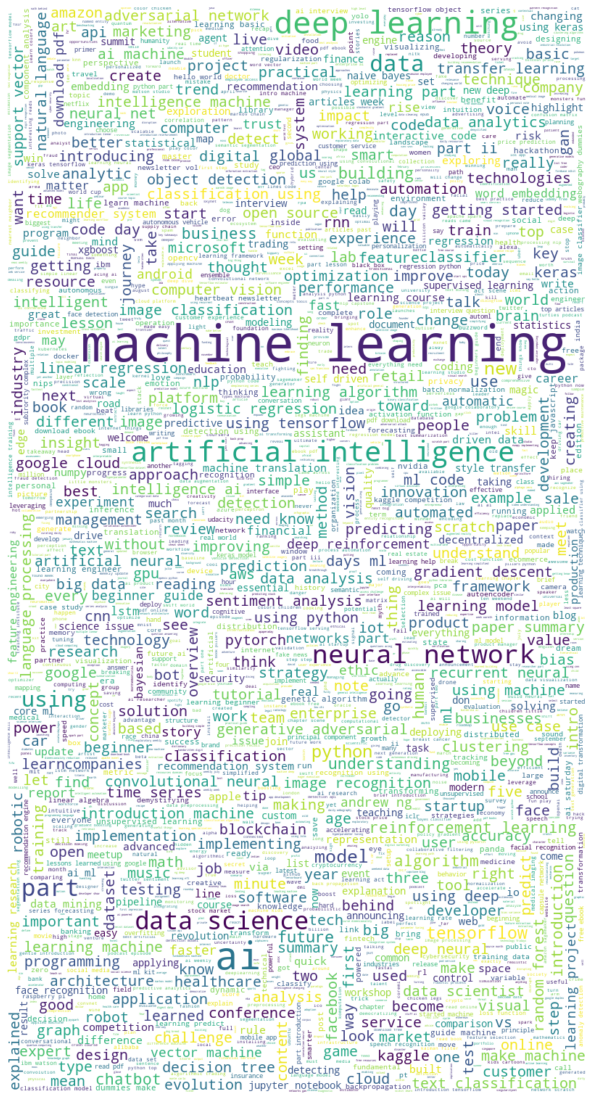

In [ ]:
words = " ".join(ml['title'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[20,20])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# removing text
# we re gonna use he word count of contetnt
ml = ml.drop(['text', 'subTitle', 'title'], axis=1);

In [35]:
ml.head()

,imageCount,linksCount,readingTime,totalClapCount,wordCount,False,True
26,1,1,1.818868,0,429,1,0
32,11,12,5.684906,271,1162,1,0
50,1,4,2.079245,11,498,1,0
59,0,1,0.067925,0,18,1,0
61,9,4,5.705660,195,1194,1,0


In [36]:
ml.columns = ['ImageCount', 'LinkCount', 'ReadingTime', 'Claps', 'ContentLen', 'SubscriptionTrue', 'SubscriptionFalse']

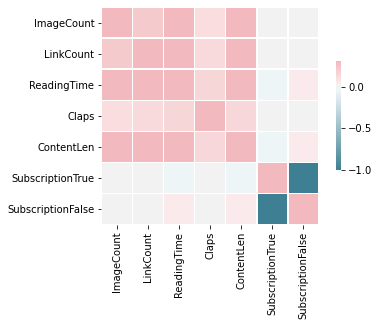

In [37]:
# correlation

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(ml[['ImageCount', 'LinkCount', 'ReadingTime', 'Claps', 'ContentLen', 'SubscriptionTrue', 'SubscriptionFalse']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
# from the correlation matrix, we can see the dependency of claps is less on SubscriptionTrue
# and SubscriptionFalse, therfore we can remove it.
ml = ml.drop(['SubscriptionTrue', 'SubscriptionFalse'], axis=1)

In [39]:
ml.head()

,ImageCount,LinkCount,ReadingTime,Claps,ContentLen
26,1,1,1.818868,0,429
32,11,12,5.684906,271,1162
50,1,4,2.079245,11,498
59,0,1,0.067925,0,18
61,9,4,5.705660,195,1194


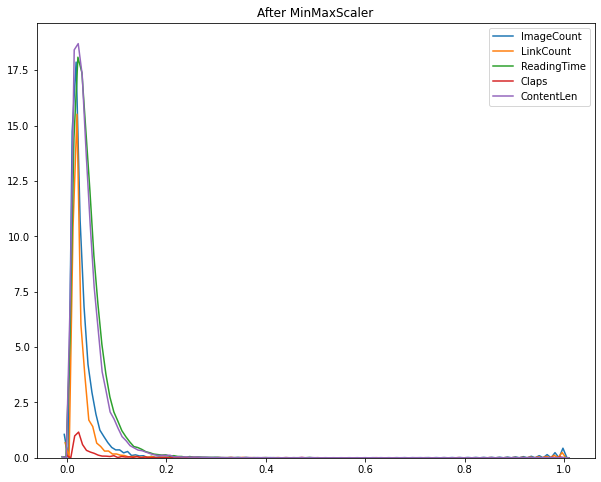

In [40]:
from sklearn import preprocessing
import seaborn as sns

mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(ml)

df_mm = pd.DataFrame(df_mm, columns=ml.columns)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['ImageCount'], ax=ax1)
sns.kdeplot(df_mm['LinkCount'], ax=ax1)
sns.kdeplot(df_mm['ReadingTime'], ax=ax1)
sns.kdeplot(df_mm['Claps'], ax=ax1)
sns.kdeplot(df_mm['ContentLen'], ax=ax1)

In [43]:
# removing outliers
from scipy import stats
import numpy as np

z_scores = stats.zscore(ml)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 10).all(axis=1)
new_df = ml[filtered_entries]

In [44]:
from scipy import stats
ml = ml[(np.abs(stats.zscore(ml)) < 3).all(axis=1)]

In [45]:
X = ml.drop(['Claps'], axis=1)
Y = ml['Claps']
print(X)
print(Y)

        ImageCount  LinkCount  ReadingTime  ContentLen
26               1          1     1.818868         429
32              11         12     5.684906        1162
50               1          4     2.079245         498
59               0          1     0.067925          18
61               9          4     5.705660        1194
...            ...        ...          ...         ...
279510           2         12     1.383333         265
279514           8          5     4.095597         785
279525          11         16     5.492453        1111
279533           5          2     4.199371         892
279544           2         13     4.885220        1193

[28136 rows x 4 columns]
26          0
32        271
50         11
59          0
61        195
         ... 
279510     11
279514      4
279525    360
279533     30
279544     21
Name: Claps, Length: 28136, dtype: int64


In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

print("train feature = ", x_train.shape)
print("test feature = ", x_test.shape)

train feature =  (18851, 4)
test feature =  (9285, 4)


In [47]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scalar1 = StandardScaler()
scalar1.fit(X)
feature_scaled = scalar1.transform(X)

pca1 = PCA(n_components=2)
pca1.fit(feature_scaled)
feature_scaled_pca = pca1.transform(feature_scaled)
print("shape of scaled and PCA'ed features", np.shape(feature_scaled_pca))

shape of scaled and PCA'ed features (28136, 2)


In [48]:
feat_var = np.var(feature_scaled_pca, axis=0)
feat_var_rat = feat_var/(np.sum(feat_var))

print ("Variance Ratio of the 4 Principal Components Ananlysis: ", feat_var_rat)

Variance Ratio of the 4 Principal Components Ananlysis:  [0.75792222 0.24207778]


In [49]:
# Pipeline Steps are StandardScaler, PCA and SVM 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SupVM', SVC(kernel='rbf'))]

check_params= {
    'pca__n_components': [2], 
    'SupVM__C': [0.1, 0.5, 1, 10,30, 40, 50, 75, 100, 500, 1000], 
    'SupVM__gamma' : [0.001, 0.005, 0.01, 0.05, 0.07, 0.1, 0.5, 1, 5, 10, 50]
}

pipeline = Pipeline(pipe_steps)

In [52]:
# it was taking a lot of time with the whole dataset
# so decided to train on just the first 500 examples

new = x_train[:500]
new_t = y_train[:500]

In [55]:
from tqdm import tqdm_notebook as tqdm

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


print ("Start Fitting Training Data")
for cv in tqdm(range(4,6)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(new, new_t)
    print ("score for %d fold CV := %3.2f" %(cv, create_grid.score(x_test, y_test)))
    print ("!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!")
    print (create_grid.best_params_)

print ("out of the loop")

Start Fitting Training Data


score for 4 fold CV := 0.26
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'SupVM__C': 0.1, 'SupVM__gamma': 0.001, 'pca__n_components': 2}
score for 5 fold CV := 0.26
!!!!!!!! Best-Fit Parameters From Training Data !!!!!!!!!!!!!!
{'SupVM__C': 0.1, 'SupVM__gamma': 0.001, 'pca__n_components': 2}

out of the loop


In [57]:
Y_pred = create_grid.predict(x_test)

In [58]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [62]:
# confusion matrix

print("Confusion Matrix: \n")
print(cm)

Confusion Matrix: 

[[2391    0    0 ...    0    0    0]
 [ 818    0    0 ...    0    0    0]
 [ 352    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
